<a href="https://colab.research.google.com/github/youyou3/colab/blob/master/KerasWalkthrough.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Keras Example

In [0]:
import tensorflow as tf
import matplotlib.pyplot as plt

## Load MNIST dataset

In [2]:
from tensorflow.examples.tutorials.mnist import input_data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)

Instructions for updating:
Please use alternatives such as official/mnist/dataset.py from tensorflow/models.
Instructions for updating:
Please write your own downloading logic.
Instructions for updating:
Please use urllib or similar directly.
Successfully downloaded train-images-idx3-ubyte.gz 9912422 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-images-idx3-ubyte.gz
Successfully downloaded train-labels-idx1-ubyte.gz 28881 bytes.
Instructions for updating:
Please use tf.data to implement this functionality.
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Instructions for updating:
Please use tf.one_hot on tensors.
Successfully downloaded t10k-images-idx3-ubyte.gz 1648877 bytes.
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Successfully downloaded t10k-labels-idx1-ubyte.gz 4542 bytes.
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
Instructions for updating:
Please use alternatives such as official/mnist/dataset.py fr

In [3]:
mnist.train.images.shape

(55000, 784)

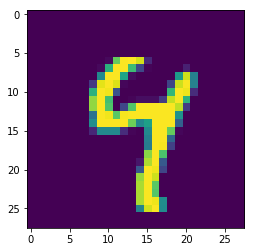

In [4]:
plt.imshow( mnist.train.images[2].reshape(28,28) )

## Build and train a Sequential Model

In [6]:
mnist.train.labels.shape

(55000, 10)

In [0]:
from keras.models import Sequential
from keras.layers import Dense, Activation

In [11]:
model = Sequential([
    Dense(10, input_shape=(784,)),
    Activation('relu'),
    Dense(10),
    Activation('softmax'),
])

Instructions for updating:
Colocations handled automatically by placer.


In [0]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

In [13]:
model.fit(mnist.train.images,mnist.train.labels,batch_size=32);

Instructions for updating:
Use tf.cast instead.
Epoch 1/1
55000/55000 [==============================] - 3s 50us/step - loss: 1.0263 - acc: 0.6951


In [14]:
model.evaluate(mnist.validation.images,mnist.validation.labels)

5000/5000 [==============================] - 0s 27us/step


[0.4907105875492096, 0.8678]

In [16]:
!pip install livelossplot

## Plot losses

Using the package https://github.com/stared/livelossplot

Install using the command `pip install livelossplot`

In [0]:
from livelossplot import PlotLossesKeras

In [0]:
plot_callback = PlotLossesKeras()

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])
#model.optimizer.lr = 0.01

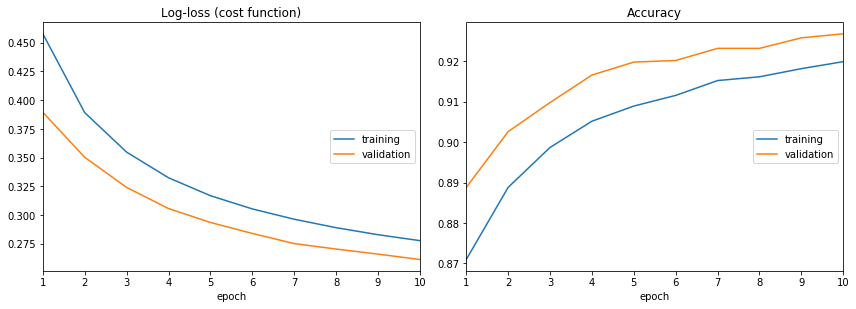

In [0]:
model.fit(mnist.train.images,mnist.train.labels, 
          validation_data=[mnist.validation.images,mnist.validation.labels],
          callbacks = [plot_callback],
          epochs=10,
          batch_size=32
         );

In [18]:
model.evaluate(mnist.test.images,mnist.test.labels)

10000/10000 [==============================] - 0s 22us/step


[0.4953215374708176, 0.8634]

## Plot Weights

In [0]:
def plot_grid(grid_array,nrows = 16,ncols = 32):
    '''
    Plots a list of images on a grid
    
    Arguments
        grid_array - numpy array of shape (1,h,w,numimgs)
        nrows,ncols - the number of rows and cols in the grid, they
                    should multiply to numimgs
    Output
        displays a large plot of the images on a grid
    '''
    init_shape = grid_array.shape

    assert( nrows*ncols == init_shape[3])
    assert( 1 == init_shape[0])

    grid_image = (grid_array.reshape(init_shape[1],init_shape[2],init_shape[3]).transpose(2,0,1)
     .reshape(nrows,ncols,init_shape[1],init_shape[2]).swapaxes(1,2)
               .reshape(nrows*init_shape[1],ncols*init_shape[2]))

    plt.figure(figsize=(20,20))
    plt.imshow(grid_image)

In [0]:
W1,b1,W2,b2 = model.get_weights()

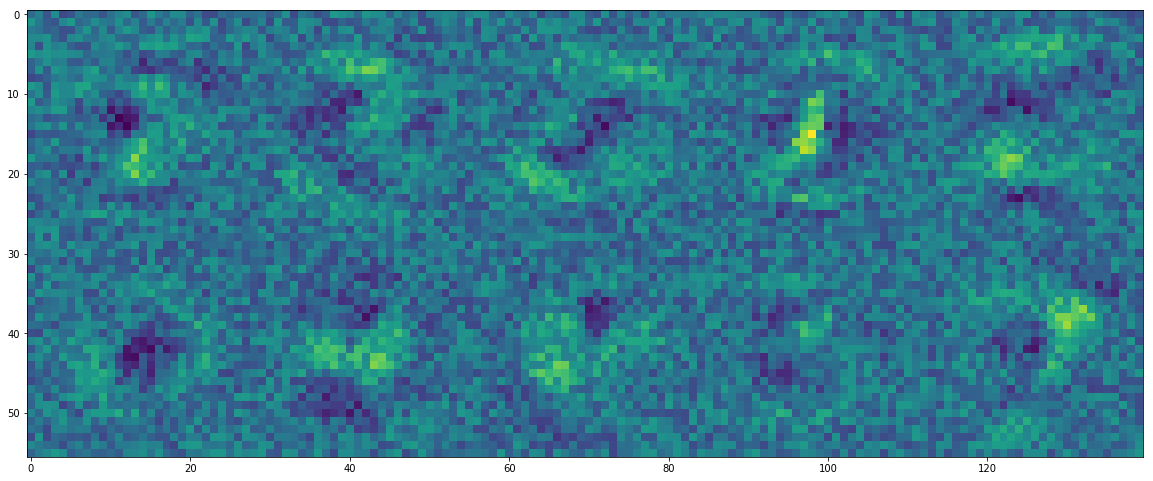

In [21]:
plot_grid(W1.reshape(1,28,28,-1), 2,5)

## Convolutional Neural Network for MNIST

In [0]:
from keras.layers import Dense, Conv2D, MaxPooling2D,Reshape,Flatten

In [0]:
model = Sequential([
    Reshape(target_shape=(28,28,1)),
    Conv2D(32,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Conv2D(64,activation="relu",kernel_size=(5,5),strides=(1,1),padding='same'),
    MaxPooling2D((2,2)),
    Flatten(),
    Dense(100,activation='relu'),
    Dense(10,activation='softmax')
])

In [0]:
model.compile(loss="categorical_crossentropy", optimizer = "sgd", metrics =["accuracy"])

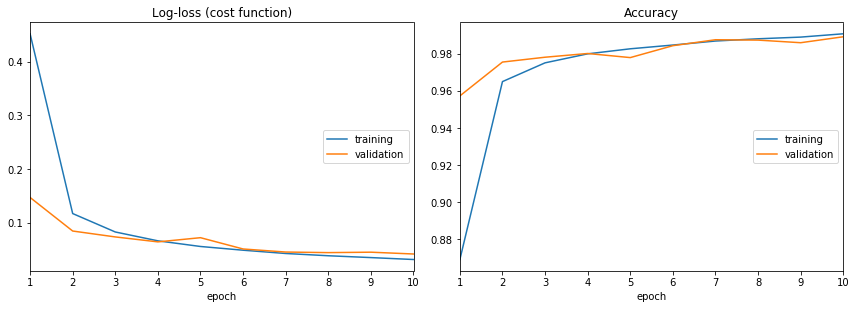

Log-loss (cost function):
training   (min:    0.032, max:    0.452, cur:    0.032)
validation (min:    0.042, max:    0.147, cur:    0.042)

Accuracy:
training   (min:    0.869, max:    0.991, cur:    0.991)
validation (min:    0.957, max:    0.989, cur:    0.989)


In [28]:
model.fit(mnist.train.images,mnist.train.labels, 
          validation_data=[mnist.validation.images,mnist.validation.labels],
          callbacks = [plot_callback],
          epochs=10,
          batch_size=32
         );